<a href="https://colab.research.google.com/github/iam-pattan/DL/blob/master/Anamoly_on_GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pycaret

In [ ]:
!unzip '/content/drive/MyDrive/Colab Notebooks/Generated data.zip'

In [4]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import pandas as pd

data = pd.read_excel('/content/Generated data/genenrated_GAN(45.66).xlsx')
data.drop(['Unnamed: 0'], axis=1, inplace=True)
data.head()

,Temperature,Grinding Time,Initial Weight,Final Weight,Water added,min,sec,W1,W2,W3
0,1587,33,106,103.553492,1,11,33,10,4,92
1,1037,22,96,46.954456,20,8,43,28,37,31
2,1977,16,106,91.055483,11,12,2,60,3,43
3,733,16,101,89.267102,24,7,61,33,53,15
4,723,12,92,84.810787,0,10,39,74,2,16


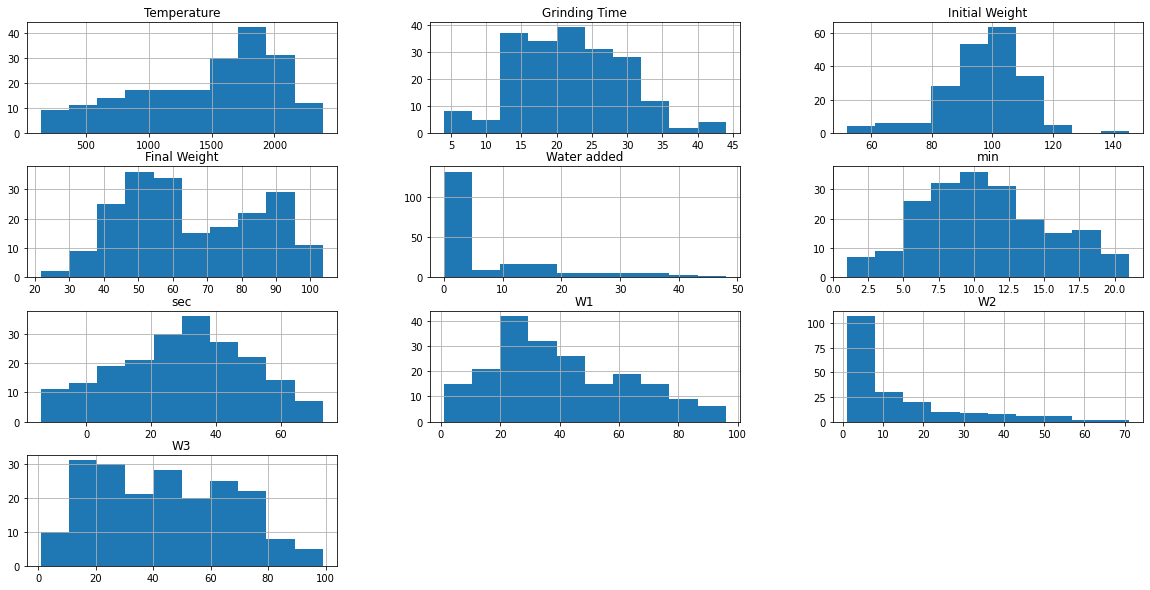

In [22]:
data.hist(figsize=(20, 10))
plt.show()

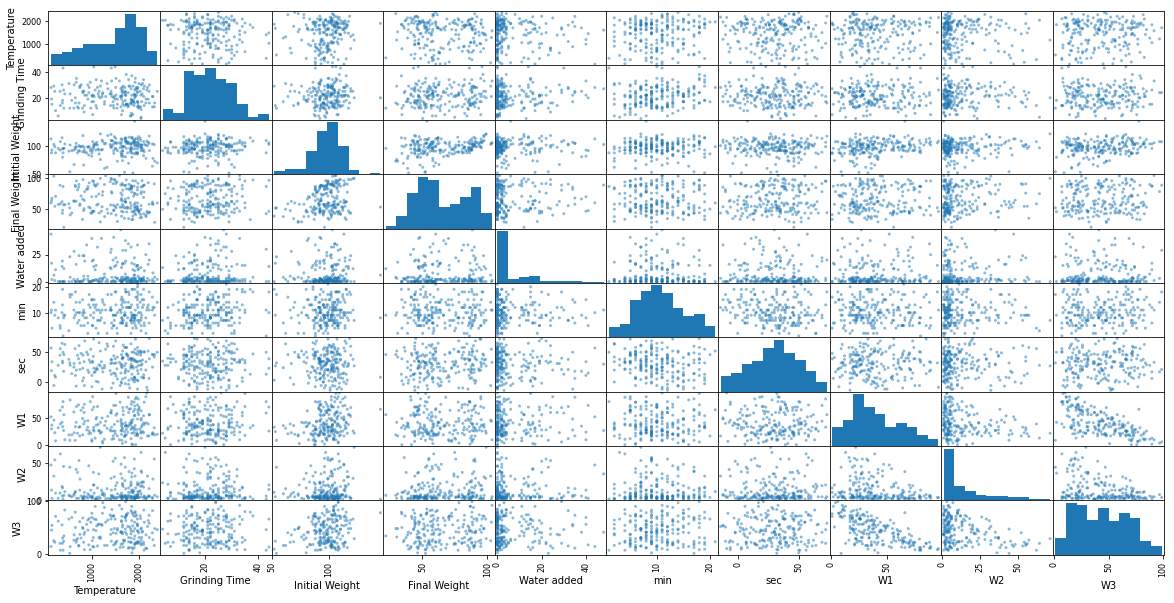

In [21]:
scatter_matrix(data, figsize=(20, 10))
plt.show()

In [ ]:
#import anomaly detection module
from pycaret.anomaly import *

#intialize the setup
exp_ano = setup(data)

# function for anamoly detection 

In [38]:
from pycaret.anomaly import *

def anamoly(mod, data):
  ''' data = 
  ['pca', 'svm', 'sos', 'knn', 'iforest', 'mcd']'''
  mod = setup(mod)
  model = create_model(data)
  print(plot_model(model, plot='umap'))
  print(model)
  outliers = assign_model(model)
  index = outliers[outliers['Anomaly']==1].index
  return outliers.head(), index

In [39]:
anamoly(data, 'sos')

None
SOS(contamination=0.05, eps=1e-05, metric='euclidean', perplexity=4.5)


(   Temperature  Grinding Time  Initial Weight  ...  W3  Anomaly  Anomaly_Score
 0         1587             33             106  ...  92        1       0.975920
 1         1037             22              96  ...  31        0       0.315014
 2         1977             16             106  ...  43        0       0.318420
 3          733             16             101  ...  15        0       0.354441
 4          723             12              92  ...  16        0       0.411499
 
 [5 rows x 12 columns],
 Int64Index([0, 37, 38, 44, 83, 102, 124, 136, 150, 152], dtype='int64'))

# iforest


In [62]:
iso_forest = create_model('iforest')
iso_forest

IForest(behaviour='new', bootstrap=False, contamination=0.05,
    max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=-1,
    random_state=8663, verbose=0)

In [27]:
plot_model(iso_forest)

In [54]:
plot_model(iso_forest, plot='umap')

In [67]:
outliers_if = assign_model(iso_forest)
outliers_if.head()

,Temperature,Grinding Time,Initial Weight,Final Weight,Water added,min,sec,W1,W2,W3,Anomaly,Anomaly_Score
0,1587,33,106,103.553492,1,11,33,10,4,92,0,-0.024711
1,1037,22,96,46.954456,20,8,43,28,37,31,0,-0.069053
2,1977,16,106,91.055483,11,12,2,60,3,43,0,-0.083132
3,733,16,101,89.267102,24,7,61,33,53,15,0,-0.000110
4,723,12,92,84.810787,0,10,39,74,2,16,0,-0.088299


In [53]:
outliers_if[outliers_if['Anomaly']==1].index

Int64Index([19, 31, 44, 49, 77, 83, 169, 173, 186, 196], dtype='int64')

#KNN

In [64]:
knn = create_model('knn')
knn

KNN(algorithm='auto', contamination=0.05, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
  radius=1.0)

In [57]:
plot_model(knn, plot='umap')

In [66]:
outliers_knn = assign_model(iso_forest)
outliers_knn.head()

,Temperature,Grinding Time,Initial Weight,Final Weight,Water added,min,sec,W1,W2,W3,Anomaly,Anomaly_Score
0,1587,33,106,103.553492,1,11,33,10,4,92,0,-0.024711
1,1037,22,96,46.954456,20,8,43,28,37,31,0,-0.069053
2,1977,16,106,91.055483,11,12,2,60,3,43,0,-0.083132
3,733,16,101,89.267102,24,7,61,33,53,15,0,-0.000110
4,723,12,92,84.810787,0,10,39,74,2,16,0,-0.088299


In [65]:
print(outliers_knn[outliers_knn['Anomaly']==1].index)

Int64Index([19, 31, 44, 49, 77, 83, 169, 173, 186, 196], dtype='int64')


# SVM

In [70]:
svm = create_model('svm')
svm

OCSVM(cache_size=200, coef0=0.0, contamination=0.05, degree=3, gamma='auto',
   kernel='rbf', max_iter=-1, nu=0.5, shrinking=True, tol=0.001,
   verbose=False)

In [75]:
 plot_model(svm, plot='umap')

In [79]:
outliers_svm = assign_model(svm)
outliers_svm.head()

,Temperature,Grinding Time,Initial Weight,Final Weight,Water added,min,sec,W1,W2,W3,Anomaly,Anomaly_Score
0,1587,33,106,103.553492,1,11,33,10,4,92,0,-0.0
1,1037,22,96,46.954456,20,8,43,28,37,31,0,-0.0
2,1977,16,106,91.055483,11,12,2,60,3,43,0,-0.0
3,733,16,101,89.267102,24,7,61,33,53,15,0,-0.0
4,723,12,92,84.810787,0,10,39,74,2,16,0,-0.0


In [80]:
print(outliers_svm[outliers_svm['Anomaly']==1].index)

Int64Index([], dtype='int64')


# mcd

In [84]:
## minimum covariance deviation
mcd = create_model('mcd')
mcd

MCD(assume_centered=False, contamination=0.05, random_state=8663,
  store_precision=True, support_fraction=None)

In [88]:
plot_model(mcd, plot='umap')

In [86]:
outliers_mcd = assign_model(mcd)
outliers_mcd.head()

,Temperature,Grinding Time,Initial Weight,Final Weight,Water added,min,sec,W1,W2,W3,Anomaly,Anomaly_Score
0,1587,33,106,103.553492,1,11,33,10,4,92,0,9.598919
1,1037,22,96,46.954456,20,8,43,28,37,31,0,13.215239
2,1977,16,106,91.055483,11,12,2,60,3,43,0,8.055373
3,733,16,101,89.267102,24,7,61,33,53,15,0,27.569132
4,723,12,92,84.810787,0,10,39,74,2,16,0,8.853887


In [87]:
print(outliers_mcd[outliers_mcd['Anomaly']==1].index)

Int64Index([19, 20, 44, 46, 49, 80, 125, 127, 138, 139], dtype='int64')
